# <u>**Least Squares**



Given a family of regression models, the least squares solution is the model that minimises the mean squared error on our training dataset. Consider the folowing **multiple linear model**:

$\begin{equation}
f(x) = w_0 + w_1 x_1 + ... + w_K x_K
\end{equation}$

where $x_1, ..., x_K$ are the predictors and $w_0, ..., w_K$ are the model's parameters. If we have a dataset consisting of $N$ samples, we can obtain the parameters of the least squares solution using the **normal equations** 

$\begin{equation}
\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
\end{equation}$

where $\mathbf{w}=[w_1, ... , w_K]^T$ are the parameters of the model, $\mathbf{y}=[y_0, ..., y_N]^T$ are the true labels in the dataset and $\mathbf{X}$ is the design matrix. The least squares solution for **simple polynomial regression** can be obtained following an identical approach. Given a polynomial model

$\begin{equation}
f(x) = w_0 + w_1 x + ... + w_K x^K
\end{equation}$

we can treat $x, x^2, ..., x^K$ as separate predictors, build the corresponding design matrix $\mathbf{X}$ and use the normal equation.

As you can see, obtaining the least square solution involves: 

- **Arrays** ($\mathbf{w}$, $\mathbf{y}$ and $\mathbf{X}$).
- **Transposition**.
- **Matrix inversion**.
- **Matrix multiplication**. 

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt

**Obtaining the least square solution involves**: 

- **Arrays** ($\mathbf{w}$, $\mathbf{y}$ and $\mathbf{X}$).
- **Transposition**.
- **Matrix inversion**.
- **Matrix multiplication**. 

In [2]:
# Define a dataset, here it consists of 10 samples described by one predictor x and one label y
x = np.array([2, 3, 1, 1, 0, 5, 4, 6, 5, 3], ndmin=2).T
y = np.array([1, 2, 2, 1, 1, 3, 3, 7, 6, 5], ndmin=2).T

<function matplotlib.pyplot.show>

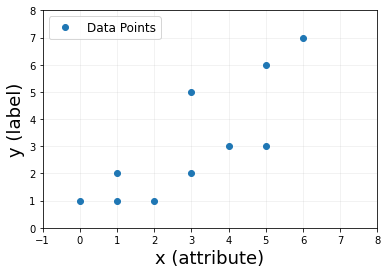

In [3]:
plt.plot(x, y, 'o', label = 'Data Points')
plt.xlabel('x (attribute)', fontsize=18)
plt.ylabel('y (label)', fontsize=18)
plt.xlim(-1,8)
plt.ylim(0, 8)
plt.grid(alpha = 0.2)
plt.legend(fontsize = 12)
plt.show

Note that here we have obtained the transpose of two row vectors using `.T` instead of `np.transpose`. Both options are equivalent. The most important point is that `x` and `y` are two column vectors consisting of 10 rows and 1 column, i.e. 10x1 vectors:

In [4]:
# Print shape
print(x.shape)
print(y.shape)

(10, 1)
(10, 1)


We can now obtain the least squares solution for a simple linear model $f(x) = w_0 + w_1x$. We first need to calculate the design matrix and then use the normal equation. We do so with the following steps

Step 1: $X^TX$

Step 2: $(X^TX)^{-1}$

Step 3: $(X^TX)^{-1}X^T$

In [5]:
X = np.column_stack([np.ones(x.shape), x])
print("The design matrix is:\n", X)

XTX = np.dot(X.T, X) # Step 1
XTX_inv = np.linalg.inv(XTX) # Step 2
XTX_invXT = np.dot(XTX_inv, X.T) # Step 3

w = np.dot(XTX_invXT, y)
print("The 2 parameters of the least squares linear solution are\n", w)

The design matrix is:
 [[1. 2.]
 [1. 3.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 5.]
 [1. 4.]
 [1. 6.]
 [1. 5.]
 [1. 3.]]
The 2 parameters of the least squares linear solution are
 [[0.43333333]
 [0.88888889]]


Now that we have the parameters $w_o$ and $w_1$ of the linear model, we can use them to predict the labels of 100 predictors uniformly spaced between -1 and 8

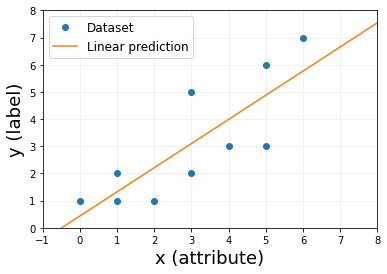

In [6]:
x_LS = np.linspace(-1,8,100).T
X_LS = np.column_stack([np.ones(x_LS.shape), x_LS])
y_LS = np.dot(X_LS, w)


plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Linear prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,8)
plt.ylim(0, 8)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

# <u>**Different Polynomial Models**

### **Quadratic Model**  $y=w_0 +w_1x + w_2x^2$

Note the design matrix will include a new column with the squares of the predictors and instead of 2, we will have 3 parameters ($w_0$, $w_1$ and $w_2$):

In [7]:
#Define a dataset
x = np.array([1, 2, 3, 5, 7, 8, 2.5, 8], ndmin=2).T
y = np.array([2.2, 3.5, 3.9, 2.9, 5, 6.2, 3, 4.8], ndmin=2).T

The design matrix is:
 [[ 1.    1.    1.  ]
 [ 1.    2.    4.  ]
 [ 1.    3.    9.  ]
 [ 1.    5.   25.  ]
 [ 1.    7.   49.  ]
 [ 1.    8.   64.  ]
 [ 1.    2.5   6.25]
 [ 1.    8.   64.  ]]
The 3 parameters of the least squares quadratic solution are
 [[2.7167995 ]
 [0.03485877]
 [0.03821489]]


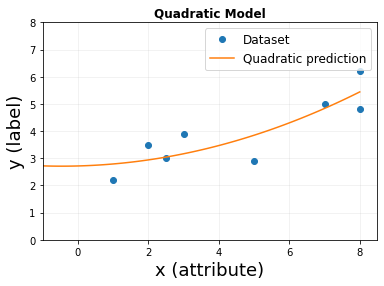

In [8]:
X = np.column_stack([np.ones(x.shape), x, x**2]) # Note we are including powers up to 3, the square of the predictors
print("The design matrix is:\n", X)

XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTX_invXT = np.dot(XTX_inv, X.T)

w = np.dot(XTX_invXT, y)
print("The 3 parameters of the least squares quadratic solution are\n", w)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2])
y_LS = np.dot(X_LS, w)


plt.plot(x, y, 'o', label="Dataset")
plt.title('Quadratic Model', weight = 'bold')
plt.plot(x_LS, y_LS, label="Quadratic prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,8.5)
plt.ylim(0, 8)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

### **Cubic Model**  $y=w_0 +w_1x + w_2x^2 + w_3x^3$

In [9]:
#Define a dataset
x = np.array([1, 2, 3, 5, 7, 8, 2.5, 8], ndmin=2).T
y = np.array([2.2, 3.5, 3.9, 2.9, 5, 6.2, 3, 4.8], ndmin=2).T

The design matrix is:
 [[  1.      1.      1.      1.   ]
 [  1.      2.      4.      8.   ]
 [  1.      3.      9.     27.   ]
 [  1.      5.     25.    125.   ]
 [  1.      7.     49.    343.   ]
 [  1.      8.     64.    512.   ]
 [  1.      2.5     6.25   15.625]
 [  1.      8.     64.    512.   ]]
The 4 parameters of the least squares cubic solution are
 [[ 0.84346828]
 [ 1.95172897]
 [-0.4743834 ]
 [ 0.03818664]]


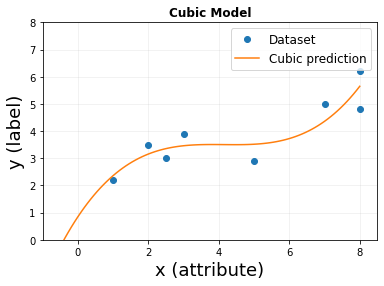

In [10]:
X = np.column_stack([np.ones(x.shape), x, x**2, x**3]) # Note we are including powers up to 3, the cube of the predictors
print("The design matrix is:\n", X)

XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTX_invXT = np.dot(XTX_inv, X.T)

w = np.dot(XTX_invXT, y)
print("The 4 parameters of the least squares cubic solution are\n", w)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2, x_LS**3])
y_LS = np.dot(X_LS, w)


plt.plot(x, y, 'o', label="Dataset")
plt.title('Cubic Model', weight = 'bold')
plt.plot(x_LS, y_LS, label="Cubic prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,8.5)
plt.ylim(0, 8)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

### **Quartic Model**  $y=w_0 +w_1x + w_2x^2 + w_3x^3 + w_4x^4$

Now we obtain the least squares solution of a polynomial of degree 4. However, lets put steps 1 to 3 into a single line of code for simplicity:

In [11]:
#Define a dataset
x = np.array([1, 2, 3, 5, 7, 8, 2.5, 8], ndmin=2).T
y = np.array([2.2, 3.5, 3.9, 2.9, 5, 6.2, 3, 4.8], ndmin=2).T

The design matrix is:
 [[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00]
 [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01]
 [1.00000e+00 3.00000e+00 9.00000e+00 2.70000e+01 8.10000e+01]
 [1.00000e+00 5.00000e+00 2.50000e+01 1.25000e+02 6.25000e+02]
 [1.00000e+00 7.00000e+00 4.90000e+01 3.43000e+02 2.40100e+03]
 [1.00000e+00 8.00000e+00 6.40000e+01 5.12000e+02 4.09600e+03]
 [1.00000e+00 2.50000e+00 6.25000e+00 1.56250e+01 3.90625e+01]
 [1.00000e+00 8.00000e+00 6.40000e+01 5.12000e+02 4.09600e+03]]
The 5 parameters of the least squares 4-degree solution are
 [[-2.28268738]
 [ 6.70145812]
 [-2.6449933 ]
 [ 0.40826587]
 [-0.02088948]]


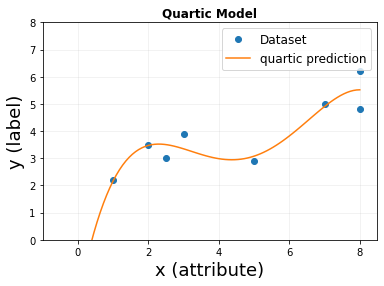

In [13]:
X = np.column_stack([np.ones(x.shape), x, x**2, x**3, x**4]) # Note we are including powers up to 4!
print("The design matrix is:\n", X)

w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print("The 5 parameters of the least squares 4-degree solution are\n", w)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2, x_LS**3, x_LS**4])
y_LS = np.dot(X_LS, w)

plt.plot(x, y, 'o', label="Dataset")
plt.title('Quartic Model', weight = 'bold')
plt.plot(x_LS, y_LS, label="quartic prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,8.5)
plt.ylim(0, 8)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()